In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def phi(x, g=1.0):
    return np.tanh(g * x)

def NeuronDynamics(J_matrix, time_steps, g, initial_state=True) :
    N = J_matrix.shape[0]
    # 뉴런 입력의 초기 상태 정의
    if initial_state :
        initial_state = np.random.randn(N)
    h = np.zeros((N, time_steps))
    h[:, 0] = initial_state
    # 동적 방정식 : h(t)를 Neuron Dynamics 중심으로 갱신.
    for t in range(1, time_steps):
        # t 시간대에서 i번째 뉴런에 대해서 따로따로 t-1 뉴런 입력값을 사용해서 갱신해야함.
        for i in range(N):
            h[i, t] = np.sum(np.dot(J_matrix[i, :], phi(h[:, t-1], g)))
    return h

def AverageAutocorrelation(activity, tau):
    N, T = activity.shape
    # phi(h_i(t)) * phi(h_i(t + tau))의 평균을 구하여 C(tau)를 계산.
    # Fix된 J, 즉 전체 시스템이 아닌 시스템의 일부만을 고려하여 C(tau), autocorrelation을 계산함.
    autocorrelation = 0
    for t in range(T - tau):
        autocorrelation += np.mean(phi(activity[:, t]) * phi(activity[:, t + tau]))
    return autocorrelation / (T - tau)

def LocalFieldAutocorrelation(activity, tau):
    N, T = activity.shape
    # phi(h_i(t)) * phi(h_i(t + tau))의 평균을 구하여 C(tau)를 계산.
    # Fix된 J, 즉 전체 시스템이 아닌 시스템의 일부만을 고려하여 C(tau), autocorrelation을 계산함.
    autocorrelation = 0
    for t in range(T - tau):
        autocorrelation += np.mean(phi(activity[:, t]) * phi(activity[:, t + tau]))
    return autocorrelation / (T - tau)


In [20]:
np.random.seed(42)
N = 300  # 뉴런의 수
T = 10000  # 시뮬레이션 시간
dt = 1.0  # 시간 간격
time_steps = int(T / dt)  # 시간 스텝 수
g = 1.0  # 비선형성 매개변수
J = 2.0  # 시냅스 결합 강도 수준
tau_values = np.arange(1, 100)
J_matrix = np.random.normal(0, J / np.sqrt(N), (N, N))
np.fill_diagonal(J_matrix, 0)  # 대각선 성분을 0으로 설정하여 자기 연결 방지
h = NeuronDynamics(J_matrix, time_steps, g)
C_tau_values = []
J2C_tau_values = []
# Average Autocorrelation 계산, Fixed J에 대하여
for tau in tau_values :
    C_tau = AverageAutocorrelation(h, tau)
    C_tau_values.append(C_tau)
    J2C_tau_values.append(J**2 * C_tau)
    
# C_tau와 J2C_tau의 시각화
plt.figure(figsize=(10, 6))
plt.plot(tau_values, C_tau_values, marker='o', linestyle='-', color='b', label='C(Tau)')
plt.plot(tau_values, J2C_tau_values, marker='x', linestyle='--', color='r', label='J^2 * C(Tau)')
plt.xlabel('Tau')
plt.ylabel('Value')
plt.title(f'C(Tau) and J^2 * C(Tau) for different Tau values, J={J}')
plt.legend()
plt.grid()
plt.show()

delta_tau_values = []
for tau in tau_values :
    delta_tau = LocalFieldAutocorrelation(h, tau)
    delta_tau_values.append(delta_tau)
delta_tau_values = np.array(delta_tau_values)
second_derivative_delta_tau = np.gradient(np.gradient(delta_tau_values, tau_values), tau_values)
delta_tau_delta_second_derivative_diff = delta_tau_values - second_derivative_delta_tau

# Δ - Δ''와 J^2 C 비교 시각화 : 계산값
plt.figure(figsize=(10, 6))
plt.plot(tau_values, delta_tau_delta_second_derivative_diff, marker='o', linestyle='-', color='b', label='Δ - Δ\'\'')
plt.plot(tau_values, J2C_tau_values, marker='x', linestyle='--', color='r', label='J^2 * C')
plt.xlabel('Tau')
plt.ylabel('Value')
plt.title('Δ - Δ\'\' vs J^2 * C for tau values')
plt.legend()
plt.grid()
plt.show()
# Δ - Δ''와 J^2 C 비교 시각화 : 오차값
error = np.abs(delta_tau_delta_second_derivative_diff - J2C_tau_values)
plt.figure(figsize=(10, 6))
plt.plot(tau_values, error, marker='s', linestyle='-', color='m', label='Error |Δ - Δ\'\' - J^2 * C|')
plt.xlabel('Tau')
plt.ylabel('Error')
plt.title('Error Analysis for Δ - Δ\'\' and J^2 * C')
plt.legend()
plt.grid()
plt.show()

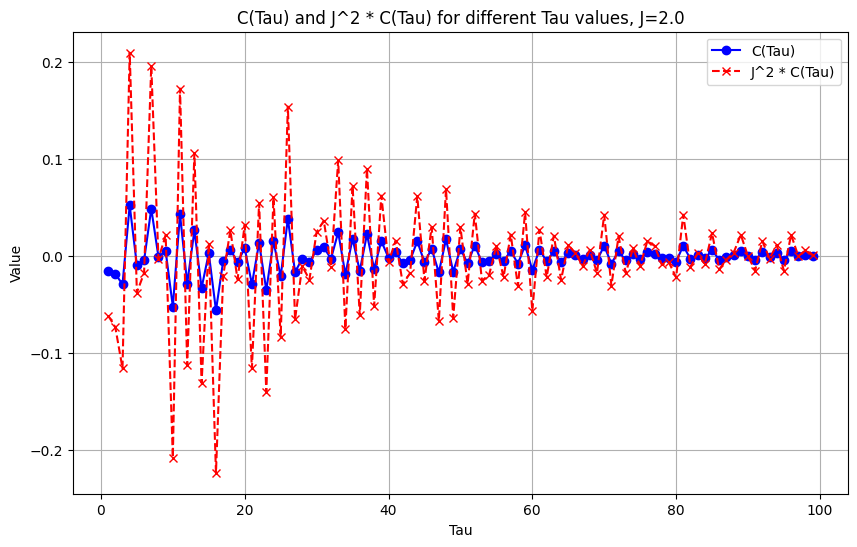

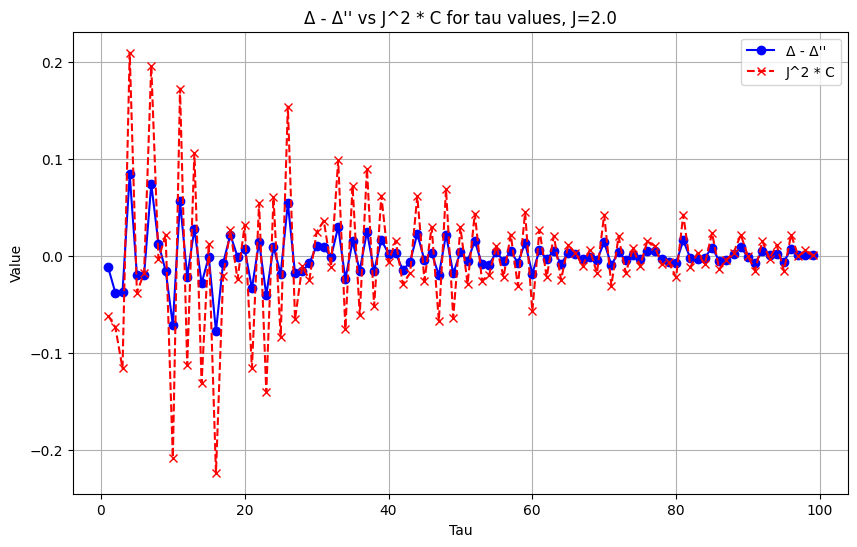

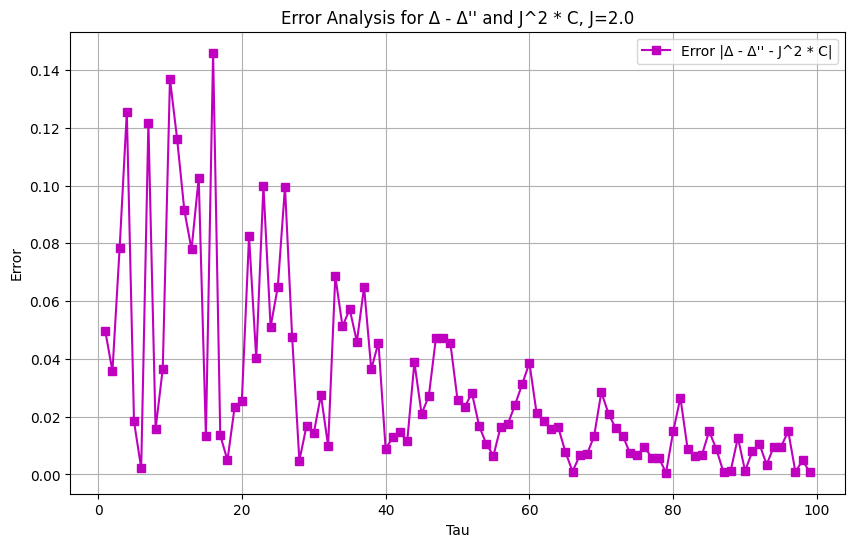

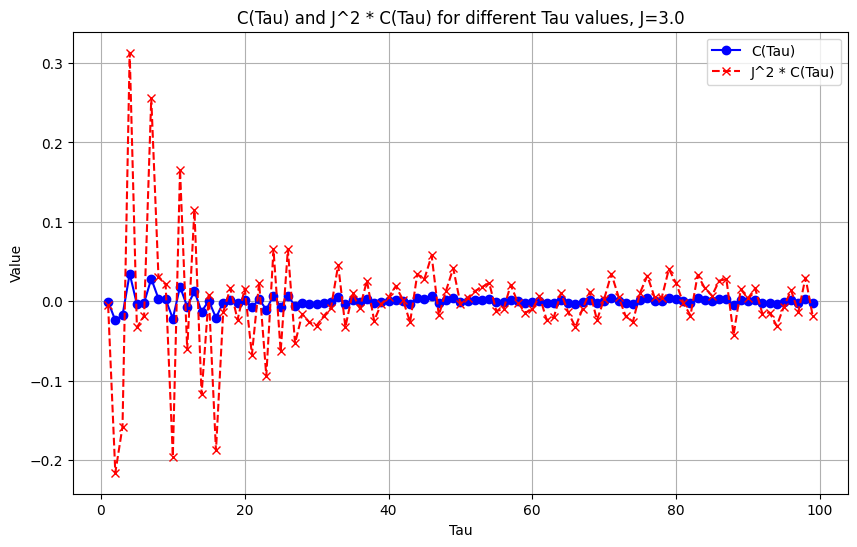

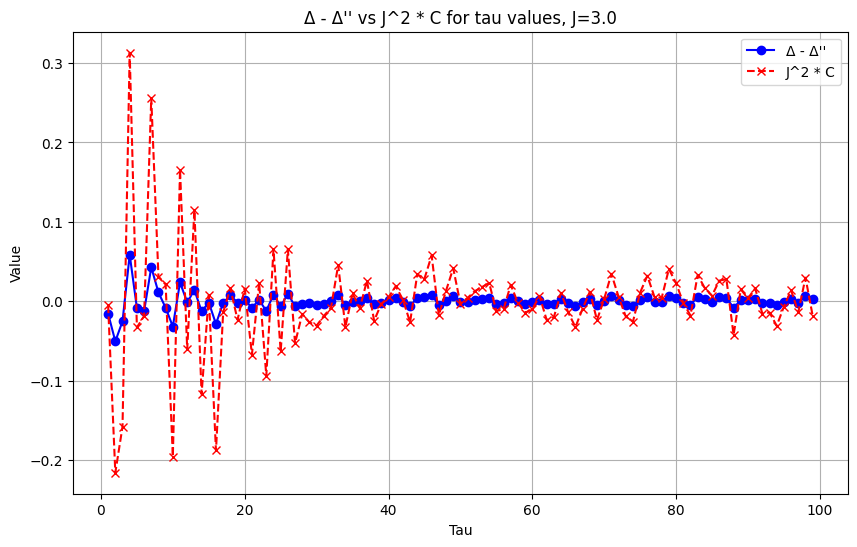

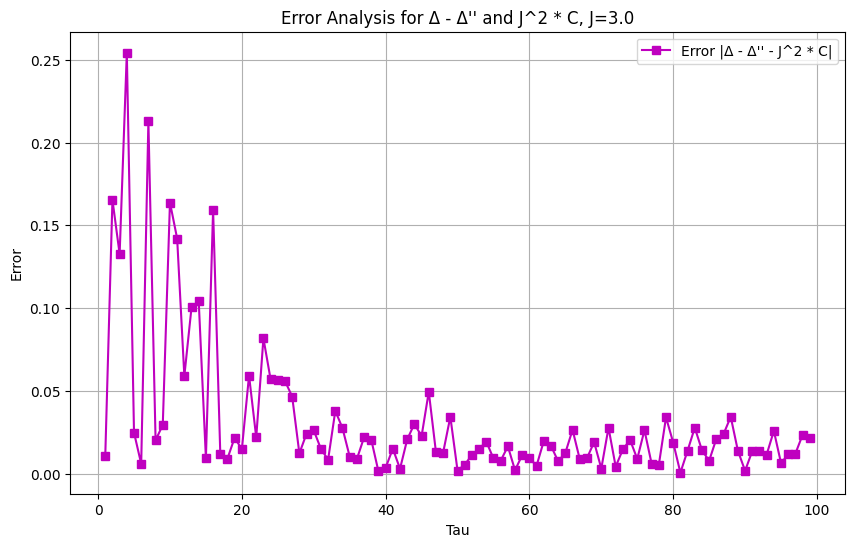

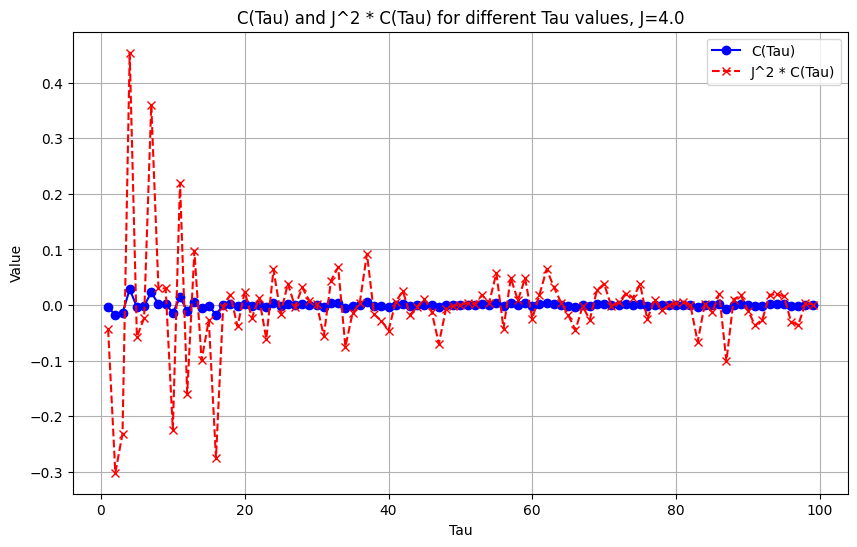

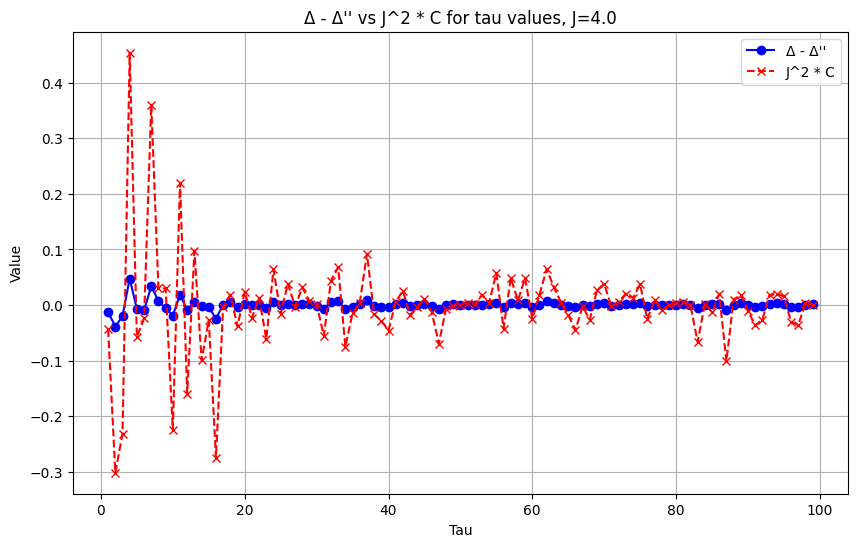

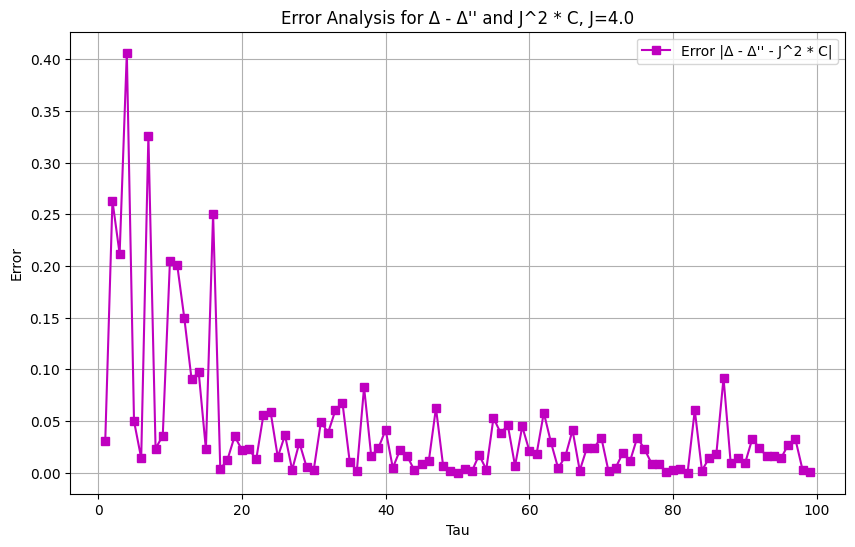

In [26]:
# 다양한 J에 대한 실험 결과 확인
J_values = [2., 3., 4.]
for J in J_values :
    np.random.seed(42)
    N = 300  # 뉴런의 수
    T = 10000  # 시뮬레이션 시간
    dt = 1.0  # 시간 간격
    time_steps = int(T / dt)  # 시간 스텝 수
    g = 1.0  # 비선형성 매개변수
    tau_values = np.arange(1, 100)
    J_matrix = np.random.normal(0, J / np.sqrt(N), (N, N))
    np.fill_diagonal(J_matrix, 0)  # 대각선 성분을 0으로 설정하여 자기 연결 방지
    h = NeuronDynamics(J_matrix, time_steps, g)
    C_tau_values = []
    J2C_tau_values = []
    # Average Autocorrelation 계산, Fixed J에 대하여
    for tau in tau_values :
        C_tau = AverageAutocorrelation(h, tau)
        C_tau_values.append(C_tau)
        J2C_tau_values.append(J**2 * C_tau)
        
    # C_tau와 J2C_tau의 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(tau_values, C_tau_values, marker='o', linestyle='-', color='b', label='C(Tau)')
    plt.plot(tau_values, J2C_tau_values, marker='x', linestyle='--', color='r', label='J^2 * C(Tau)')
    plt.xlabel('Tau')
    plt.ylabel('Value')
    plt.title(f'C(Tau) and J^2 * C(Tau) for different Tau values, J={J}')
    plt.legend()
    plt.grid()
    plt.savefig(f'C(Tau)_and_J^2*C(Tau)_J_{J}.png')

    # delta_tau 및 2차미분값 계산
    delta_tau_values = []
    for tau in tau_values :
        delta_tau = LocalFieldAutocorrelation(h, tau)
        delta_tau_values.append(delta_tau)
    delta_tau_values = np.array(delta_tau_values)
    second_derivative_delta_tau = np.gradient(np.gradient(delta_tau_values, tau_values), tau_values)
    delta_tau_delta_second_derivative_diff = delta_tau_values - second_derivative_delta_tau

    # Δ - Δ''와 J^2 C 비교 시각화 : 계산값
    plt.figure(figsize=(10, 6))
    plt.plot(tau_values, delta_tau_delta_second_derivative_diff, marker='o', linestyle='-', color='b', label='Δ - Δ\'\'')
    plt.plot(tau_values, J2C_tau_values, marker='x', linestyle='--', color='r', label='J^2 * C')
    plt.xlabel('Tau')
    plt.ylabel('Value')
    plt.title(f'Δ - Δ\'\' vs J^2 * C for tau values, J={J}')
    plt.legend()
    plt.grid()
    plt.savefig(f"delta_tau_delta_second_derivative_diff_vs_J^2*C_J_{J}.png")
    # Δ - Δ''와 J^2 C 비교 시각화 : 오차값
    error = np.abs(delta_tau_delta_second_derivative_diff - J2C_tau_values)
    plt.figure(figsize=(10, 6))
    plt.plot(tau_values, error, marker='s', linestyle='-', color='m', label='Error |Δ - Δ\'\' - J^2 * C|')
    plt.xlabel('Tau')
    plt.ylabel('Error')
    plt.title(f'Error Analysis for Δ - Δ\'\' and J^2 * C, J={J}')
    plt.legend()
    plt.grid()
    plt.savefig(f"delta_tau_delta_second_derivative_diff_vs_J^2*C_Error_J_{J}.png")
        

In [30]:
# eta(gaussian noise)를 사용한 결과를 통한 비교
# eta의 autocorrelation 값은 J^2*C(tau)를 따름. 이는 곧 tau=0일 때 eta(t)의 분산이 J^2*C(0)와 같다는 뜻
eta = np.zeros((N, time_steps))
for t in range(time_steps):
    # η(t)는 평균 0, 분산 J^2 * C(τ)인 가우시안 분포를 따릅니다.
    variance = J**2 * C_tau_values[min(t, len(C_tau_values)-1)]
    eta[:, t] = np.random.normal(0, np.sqrt(variance), N)

def simulate_neuron_with_eta(eta, time_steps, initial_state=None):
    N = eta.shape[0]  # 뉴런의 수
    if initial_state is None:
        initial_state = np.random.randn(N)  # 정규 분포 랜덤 초기화
    h = np.zeros((N, time_steps))  # 뉴런의 상태 (NxT 행렬)
    h[:, 0] = initial_state  # 초기 상태 설정
    for t in range(1, time_steps):
        # t 시간대에서 i번째 뉴런에 대해서 따로따로 t-1 뉴런 입력값을 사용해서 갱신해야함.
        for i in range(N):
            h[i, t] = eta[i, t]
    return h


/var/folders/9s/plmk0lx90kg379tsvg5fx8940000gn/T/ipykernel_74234/1903616304.py:7: RuntimeWarning: invalid value encountered in sqrt
  eta[:, t] = np.random.normal(0, np.sqrt(variance), N)
